# Star Wars 
## DataQuest Project

This notebook deals with a scenario as part of the Dataquest.io curriculum.

### Description
The team behind FiveThirtyEight performed a survey amongst 835 Americans, asking them various questions regarding their opinion of the Star Wars movies. At the time of the survey being taken, there were 6 Star Wars movies. We'll use this data to answer a variety of questions.


### Data
The data can be found on [FiveThirtyEight's GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

### Data cleaning

The initial exploration shows that all columns are missing values to some extent.

In [4]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [5]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Every row should correspond to a single person with a unique Respondent ID.

In [6]:
star_wars.iloc[:5,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3


In [7]:
# Removing rows where RespondentID is null. This removes 1 row.
star_wars = star_wars[star_wars['RespondentID'].notnull()]

Some columns contain Yes / No answers, which are easier to work with if they are converted to booleans.

In [8]:
yes_no = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

There are several columns that indicate whether the respondent has seen the particular Star Wars movie. If a respondent has seen the movie, the title of the movie is given as a value. If the respondent has not seen the movie, the value is null. We'll transform these to boolean values as well for easier analysis.

In [9]:
def seen(movie):
    if pd.isnull(movie):
        return False
    elif "Star Wars" in movie:
        return True

In [10]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].apply(seen)
star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].apply(seen)
star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].apply(seen)
star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].apply(seen)
star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].apply(seen)
star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].apply(seen)

In [11]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [12]:
# Renaming columns to something more descriptive.
star_wars = star_wars.rename(columns=
                {
                    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                    'Unnamed: 4': 'seen_2',
                    'Unnamed: 5': 'seen_3',
                    'Unnamed: 6': 'seen_4',
                    'Unnamed: 7': 'seen_5',
                    'Unnamed: 8': 'seen_6',
                })

In [13]:
for idx, question in enumerate(star_wars.columns):
    print(idx, question)

0 RespondentID
1 Have you seen any of the 6 films in the Star Wars franchise?
2 Do you consider yourself to be a fan of the Star Wars film franchise?
3 seen_1
4 seen_2
5 seen_3
6 seen_4
7 seen_5
8 seen_6
9 Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
10 Unnamed: 10
11 Unnamed: 11
12 Unnamed: 12
13 Unnamed: 13
14 Unnamed: 14
15 Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
16 Unnamed: 16
17 Unnamed: 17
18 Unnamed: 18
19 Unnamed: 19
20 Unnamed: 20
21 Unnamed: 21
22 Unnamed: 22
23 Unnamed: 23
24 Unnamed: 24
25 Unnamed: 25
26 Unnamed: 26
27 Unnamed: 27
28 Unnamed: 28
29 Which character shot first?
30 Are you familiar with the Expanded Universe?
31 Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
32 Do you consider yourself to be a fan of the Star Trek franchise?
33 Gender
34 Age
35 Household Income
36 Education
3

The values in the ranking columns are stored as strings rather than being numeric. Converting them to numeric makes the analysis easier.

In [14]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [15]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
})

### Data analysis

#### Overall ranking 
Calculating the mean for every ranking_x column gives us the average ranking for every movie. This shows that Episode V: The Empire Strikes Back is the highest ranked in this survey.

**Note**: the below results are rankings and not ratings, meaning that a lower number is better.

In [16]:
avg_ranking = star_wars.iloc[:,9:15].mean()

In [17]:
%matplotlib inline

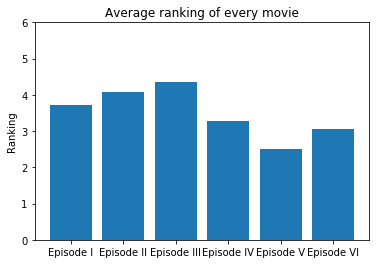

In [81]:
plt.bar(range(0,len(avg_ranking)), avg_ranking, tick_label=avg_ranking.index)
plt.title("Average ranking of every movie")
plt.xticks(ticks=range(0, 6, 1), labels=["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"])
plt.ylim(0,6)
plt.ylabel("Ranking")
plt.show()

#### Movies seen
Calculating the sum of every seen_x column tells us how many people watched each movie. Again Episode V comes out on top. This would make sense. More people have seen it and therefore consider it the best movie.

In [19]:
seen_cols = [col for col in star_wars.columns if 'seen_' in col]

seen_sum = star_wars[seen_cols].sum()

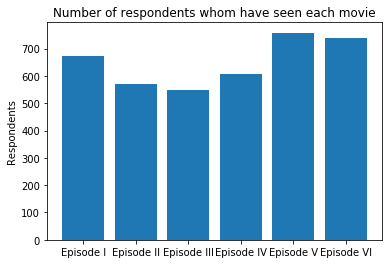

In [76]:
plt.bar(range(0,len(seen_sum)), seen_sum, tick_label=seen_sum.index)
plt.xticks(ticks=range(0, 6, 1), labels=["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"])
plt.ylabel("Respondents")
plt.title("Number of respondents whom have seen each movie")
plt.show()

#### Segmentation: fans vs. non-fans

In addition it might be interesting to further analyse based on whether people consider themselves to be a fan of the franchise or not. People either said they were a fan (value = True), they weren't a fan (value = False) or there was no response. We'll only look at True / False and ignore no responses.

In [21]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

#### Ranking

In [22]:
fans_avg_ranking = fans.iloc[:,9:15].mean()
fans_seen_sum = fans[seen_cols].sum()

non_fans_avg_ranking = non_fans.iloc[:,9:15].mean()
non_fans_seen_sum = non_fans[seen_cols].sum()

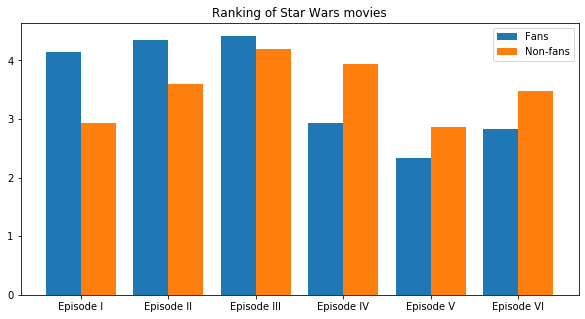

In [66]:
rankfig, rankax = plt.subplots(figsize=(10,5))
bwidth = 0.4
rankfans = rankax.bar(range(1,7), fans_avg_ranking, width=bwidth, label="Fans")
ranknonfans = rankax.bar(np.arange(1.4,7.4, 1), non_fans_avg_ranking, width=bwidth, label="Non-fans")
plt.xticks(ticks=np.arange(1.2, 7.2, 1), labels=["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"])
plt.title("Ranking of Star Wars movies")
plt.legend()
plt.show()

The order of ranking for the movies is different if you look at fans vs non fans. Most interesting is the major difference between how Episode I is rated. This could have something to do with the presence of Jar Jar Binks, a controversial character as many people find him to be annoying.

#### Movies seen

The total number of people who have seen a movie per fan / non fan group doesn't mean anything. We need to look at the percentage of the group that has seen a movie.

In [25]:
fans_seen_pct = fans_seen_sum / len(fans) * 100
non_fans_seen_pct = non_fans_seen_sum / len(non_fans) * 100

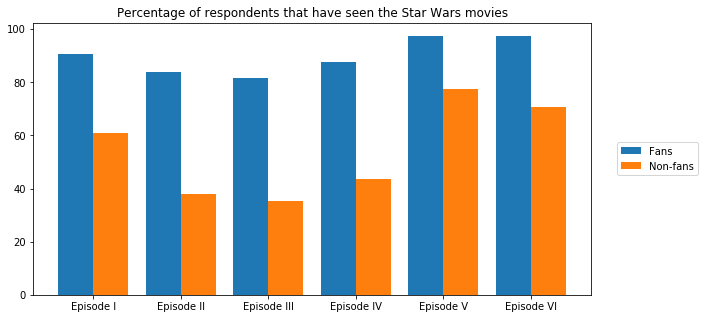

In [65]:
seenfig, seenax = plt.subplots(figsize=(10,5))
seenfans = seenax.bar(range(1,7), fans_seen_pct, width=bwidth, label="Fans")
seennonfans = seenax.bar(np.arange(1.4,7.4, 1), non_fans_seen_pct, width=bwidth, label="Non-fans")
plt.xticks(ticks=np.arange(1.2, 7.2, 1), labels=["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"])
plt.title("Percentage of respondents that have seen the Star Wars movies")
plt.legend(loc='center right', bbox_to_anchor=(1.2,0.5))
plt.show()

Non surprisingly the percentages of people who have seen the movies are way higher for fans than they are for non fans.